In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',50)

In [2]:
## reading the  file
df =  pd.read_excel('Data_Train (1).xlsx')

In [3]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,Null,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,Null,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,Null,8625


In [4]:
## getting general information regarding dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
##  number of unique values in each column/feature:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [6]:
## duplicates in dataset
df.duplicated().sum()

220

In [7]:
## Statistical Information
df.describe(include = ['O']).T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,Null,8347


In [8]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
## checking null values
df.isnull().sum().sort_values(ascending = False)

Route              1
Total_Stops        1
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Additional_Info    0
Price              0
dtype: int64

In [10]:
for i in df.columns:
    print(f'The unique values in feature {i} is:',df[i].unique(),sep = '\n')

The unique values in feature Airline is:
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
The unique values in feature Date_of_Journey is:
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
The unique values in feature Source is:
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
The unique values in feature Destination is:
['New Delhi' 'Ba

In [11]:
for i in df.columns:
    print(f"The value counts for each value in {i} column is/are :  \n{df[i].value_counts()}")
    print('---------------------------------------------------------------------------------------')

The value counts for each value in Airline column is/are :  
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
---------------------------------------------------------------------------------------
The value counts for each value in Date_of_Journey column is/are :  
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    32

In [12]:
## Checking Feature:Additional Info
df["Additional_Info"].unique()

array(['Null ', 'Null', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [13]:
## percentage of null values in additional_info
factor = len(df[(df["Additional_Info"]=='Null')|(df["Additional_Info"]=='Null ')])/len(df["Additional_Info"])
percentage_null_values = factor*100
percentage_null_values
## later we can drop this column as percentage is over 75%, hence information extracted is less.

78.14284377047646

## Feature Engineering

In [14]:
def preprocess(data):
    '''Function preprocesses the data and make it model ready. Simply push dataframe in the function.
    !!! Use only after treating null values or when null values are less enough to drop. It returns two dataframes,
    one for eda and one for model.'''
    
    data.dropna(inplace = True)
    
    df.drop_duplicates(inplace = True)
    
    data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
    data['day']=pd.DatetimeIndex(data['Date_of_Journey']).day
    data['month']=pd.DatetimeIndex(data['Date_of_Journey']).month
    data['year']=pd.DatetimeIndex(data['Date_of_Journey']).year
    data['weekday'] = pd.DatetimeIndex(data['Date_of_Journey']).weekday
    
    data['Total_Stops'] = data['Total_Stops'].str.replace('non-stop','0')
    data['Total_Stops'] = data['Total_Stops'].str.replace('stops','')
    data['Total_Stops'] = data['Total_Stops'].str.replace('stop','')
    data['Total_Stops'] = data['Total_Stops'].astype(int)
    
    data['Destination'] = np.where(data['Destination']=='New Delhi',"Delhi",data['Destination'])
    data['Airline'] = np.where(data['Airline']=='Jet Airways Business',"Jet Airways",data['Airline'])
    
    Arrival_Time = []
    for i in data['Arrival_Time']:
        Arrival_Time.append(i[:5])
    data['Arrival_Time'] = Arrival_Time
    data['Arrival_Time_Hour'] = pd.DatetimeIndex(data['Arrival_Time']).hour
    data['Arrival_Time_Minutes'] = pd.DatetimeIndex(data['Arrival_Time']).minute
    
    data['Dep_Time_Hour'] = pd.DatetimeIndex(data['Dep_Time']).hour
    data['Dep_Time_Minute'] = pd.DatetimeIndex(data['Dep_Time']).minute
    
    data["Duration_Total_Hour"] = data["Duration"].str.replace("h", '*1').str.replace(' ', '+').str.replace('m', '/60').apply(eval)
    
    data1 = pd.get_dummies(data, prefix=['Airline', 'Source', 'Destination'], columns=['Airline', 'Source','Destination'],drop_first = False)
    
    data1.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration','Additional_Info','year'],axis = 1,inplace = True)
    return data,data1

In [15]:
data,data_model = preprocess(df)

In [16]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,weekday,Arrival_Time_Hour,Arrival_Time_Minutes,Dep_Time_Hour,Dep_Time_Minute,Duration_Total_Hour
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10,2h 50m,0,Null,3897,24,3,2019,6,1,10,22,20,2.833333
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,Null,7662,5,1,2019,5,13,15,5,50,7.416667
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,Null,13882,6,9,2019,4,4,25,9,25,19.000000
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,Null,6218,5,12,2019,3,23,30,18,5,5.416667
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,Null,13302,3,1,2019,3,21,35,16,50,4.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,Null,4107,4,9,2019,2,22,25,19,55,2.500000
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,Null,4145,27,4,2019,5,23,20,20,45,2.583333
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,Null,7229,27,4,2019,5,11,20,8,20,3.000000
10681,Vistara,2019-01-03,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,0,Null,12648,3,1,2019,3,14,10,11,30,2.666667


In [17]:
data_model

,Route,Total_Stops,Price,day,month,weekday,Arrival_Time_Hour,Arrival_Time_Minutes,Dep_Time_Hour,Dep_Time_Minute,Duration_Total_Hour,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,BLR → DEL,0,3897,24,3,6,1,10,22,20,2.833333,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,CCU → IXR → BBI → BLR,2,7662,5,1,5,13,15,5,50,7.416667,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,DEL → LKO → BOM → COK,2,13882,6,9,4,4,25,9,25,19.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,CCU → NAG → BLR,1,6218,5,12,3,23,30,18,5,5.416667,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,BLR → NAG → DEL,1,13302,3,1,3,21,35,16,50,4.750000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,0,4107,4,9,2,22,25,19,55,2.500000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
10679,CCU → BLR,0,4145,27,4,5,23,20,20,45,2.583333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
10680,BLR → DEL,0,7229,27,4,5,11,20,8,20,3.000000,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
10681,BLR → DEL,0,12648,3,1,3,14,10,11,30,2.666667,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0


# EDA

## Univariate Analysis

<AxesSubplot:xlabel='Airline', ylabel='count'>

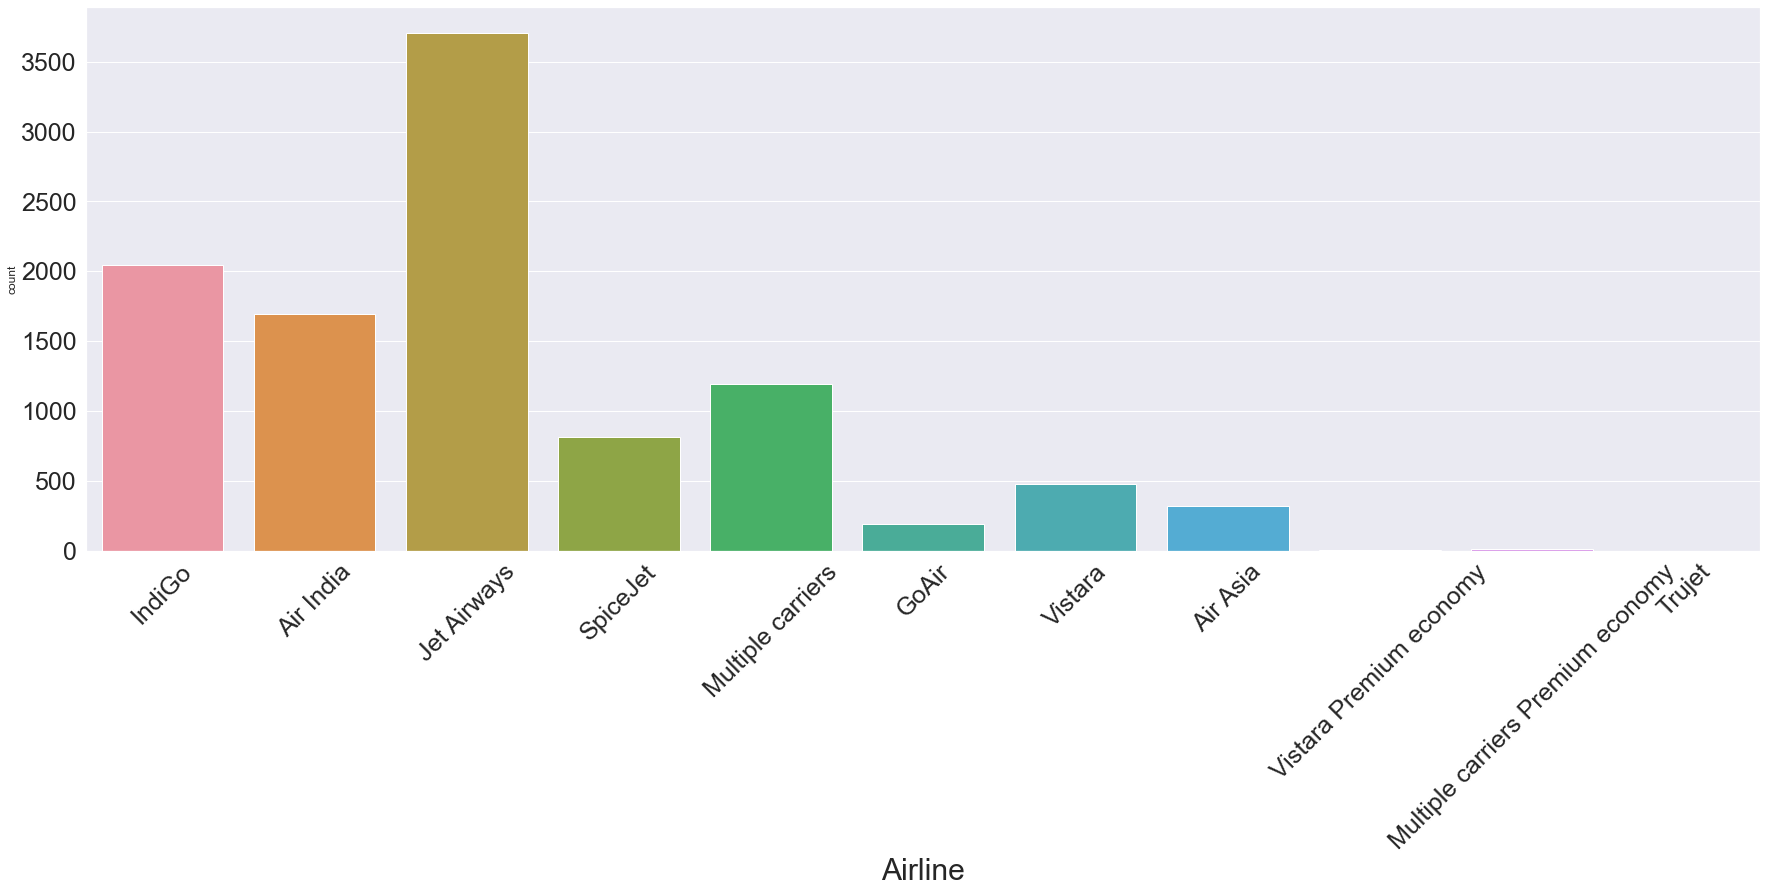

In [18]:
plt.figure(figsize=(30,10))
plt.xticks(rotation = 45,fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(xlabel = 'Airline', fontsize = 30)
sns.countplot(df['Airline'])

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

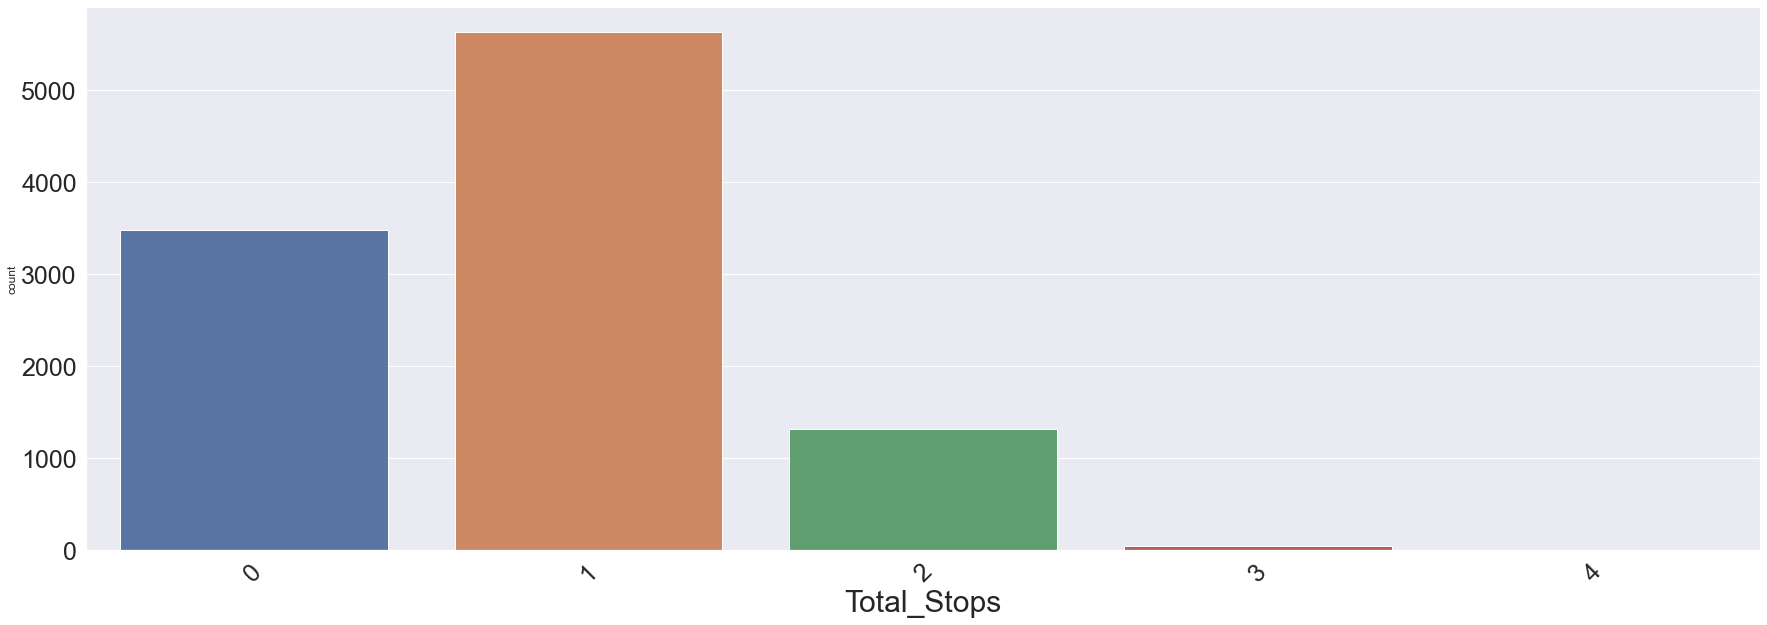

In [19]:
plt.figure(figsize=(30,10))
plt.xticks(rotation = 45,fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(xlabel = 'Total_Stops', fontsize = 30)
sns.countplot(data['Total_Stops'])

<AxesSubplot:xlabel='Source', ylabel='count'>

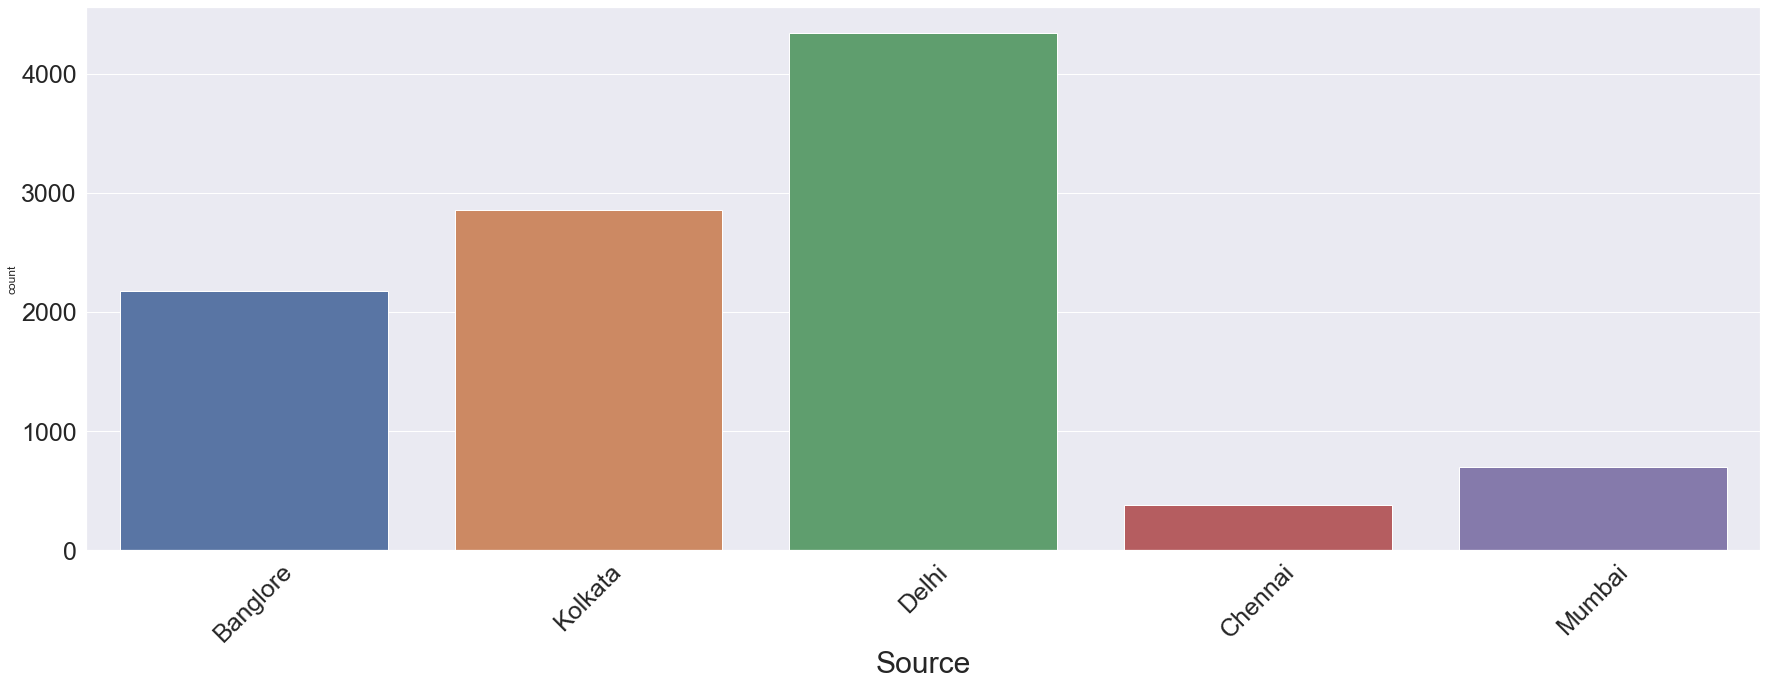

In [20]:
plt.figure(figsize=(30,10))
plt.xticks(rotation = 45,fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(xlabel = 'Source', fontsize = 30)
sns.countplot(df['Source'])

<AxesSubplot:xlabel='Destination', ylabel='count'>

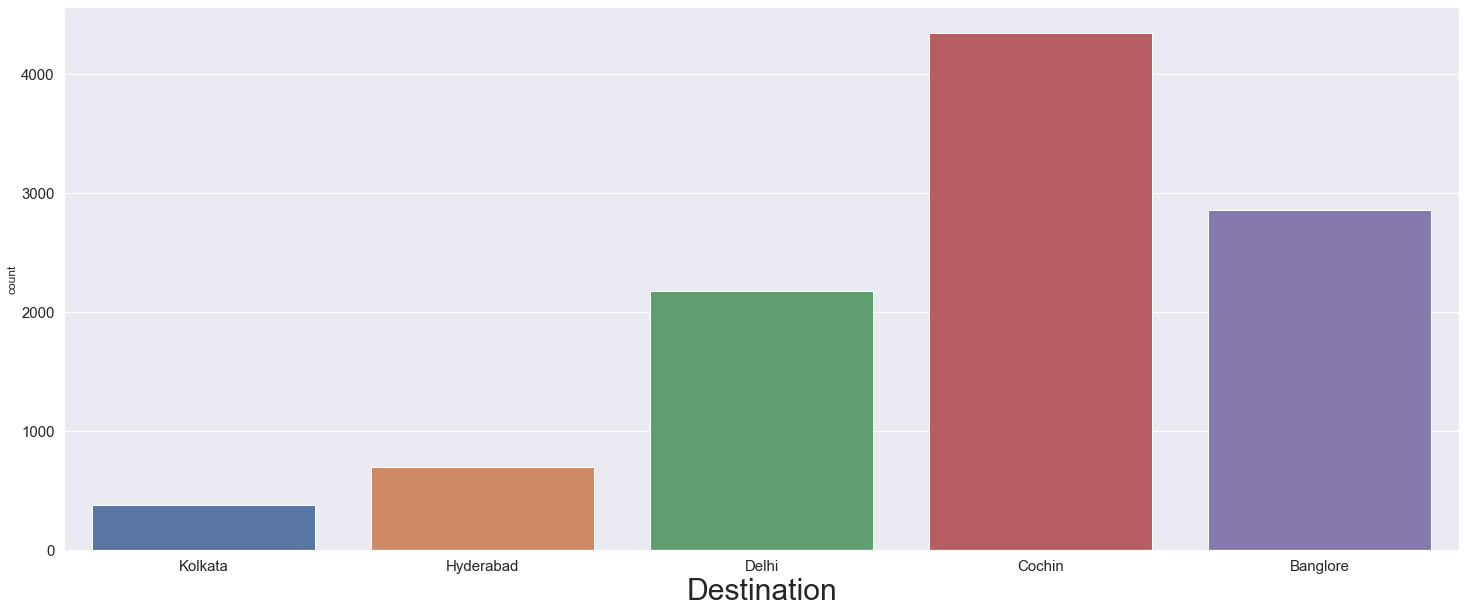

In [21]:
plt.figure(figsize=(25,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Destination', fontsize = 30)
sns.countplot(df['Destination'].sort_values(ascending = False))

<AxesSubplot:xlabel='Dep_Time_Hour', ylabel='count'>

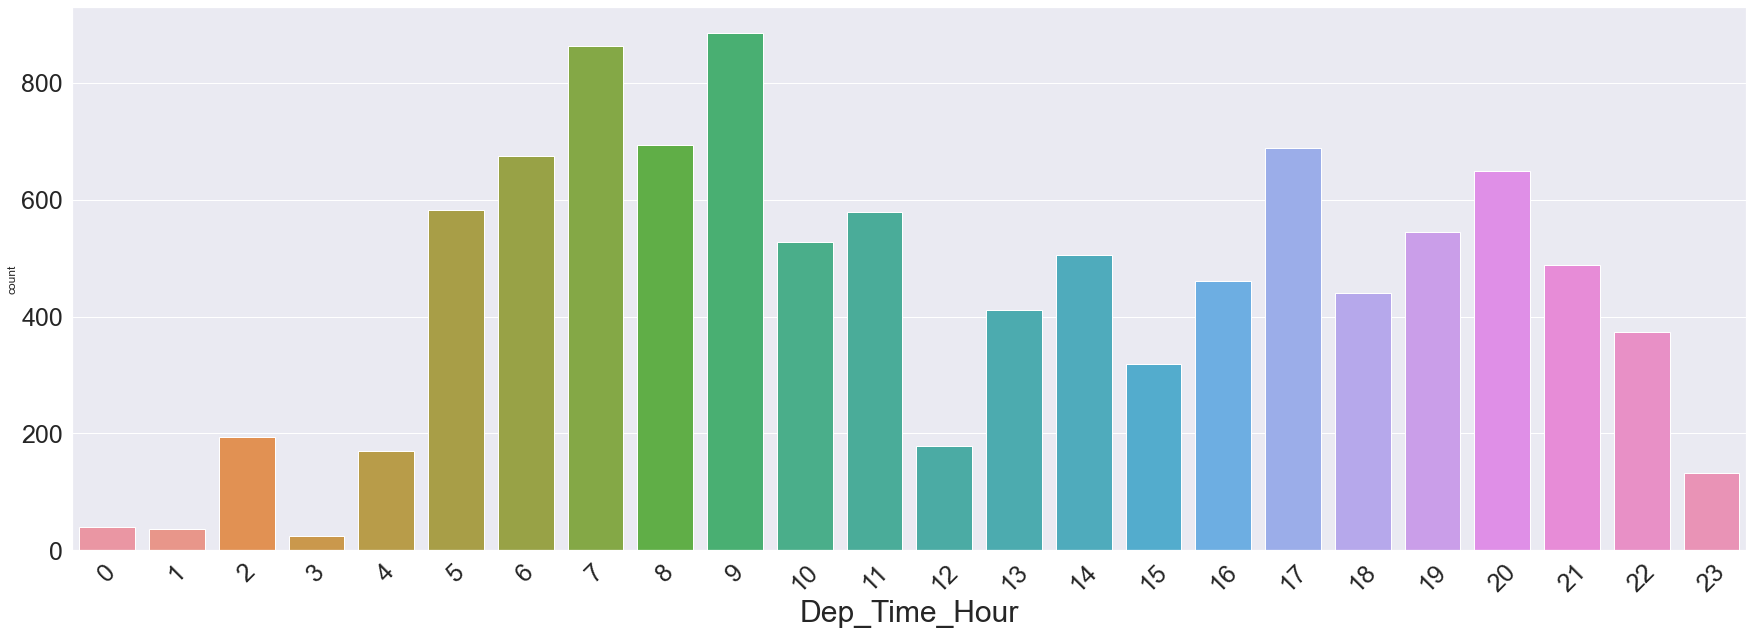

In [22]:
plt.figure(figsize=(30,10))
plt.xticks(rotation = 45,fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(xlabel = 'Dep_Time_Hour', fontsize = 30)
sns.countplot(data['Dep_Time_Hour'].sort_values())

<AxesSubplot:xlabel='Arrival_Time_Hour', ylabel='count'>

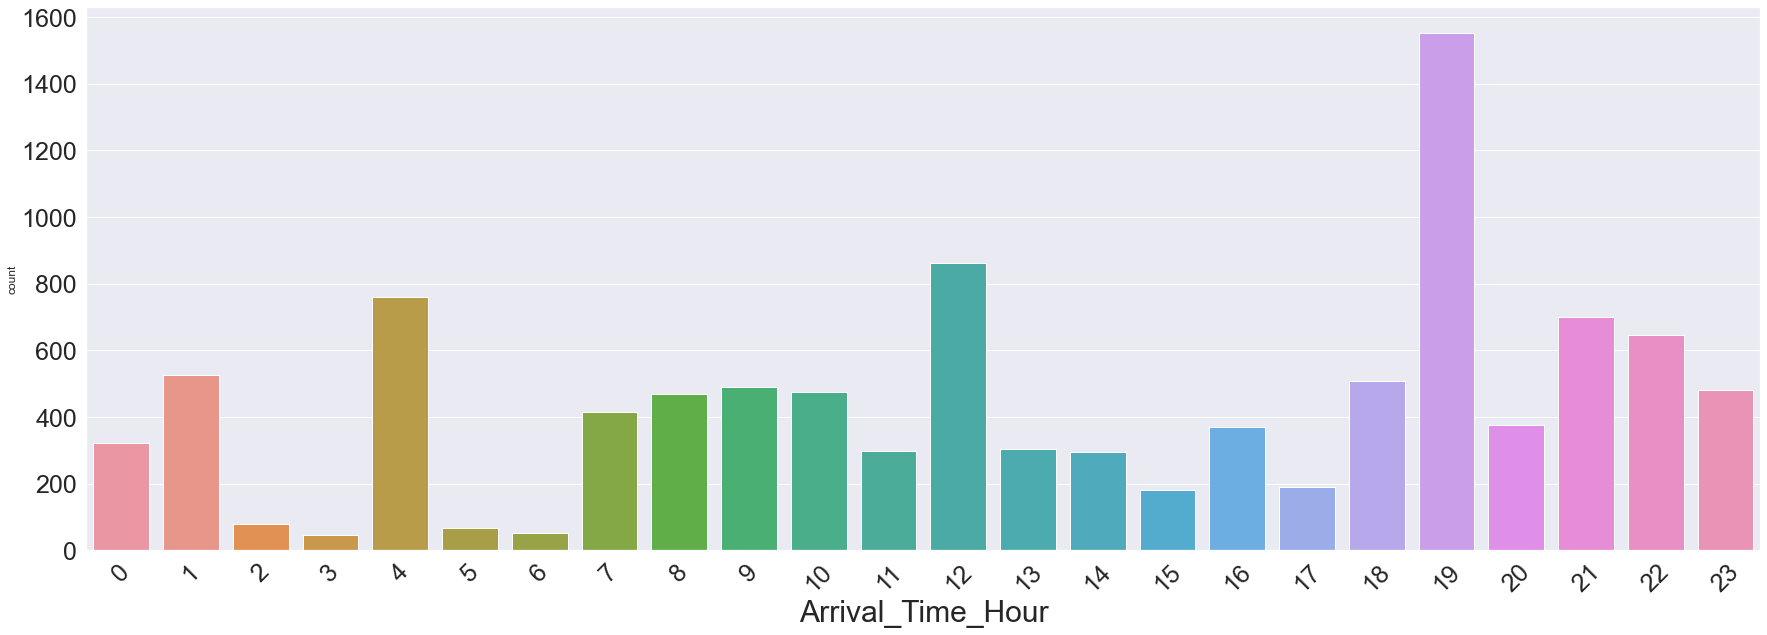

In [23]:
plt.figure(figsize=(30,10))
plt.xticks(rotation = 45,fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(xlabel = 'Arrival_Time_Hour', fontsize = 30)
sns.countplot(data['Arrival_Time_Hour'])

<AxesSubplot:xlabel='day', ylabel='count'>

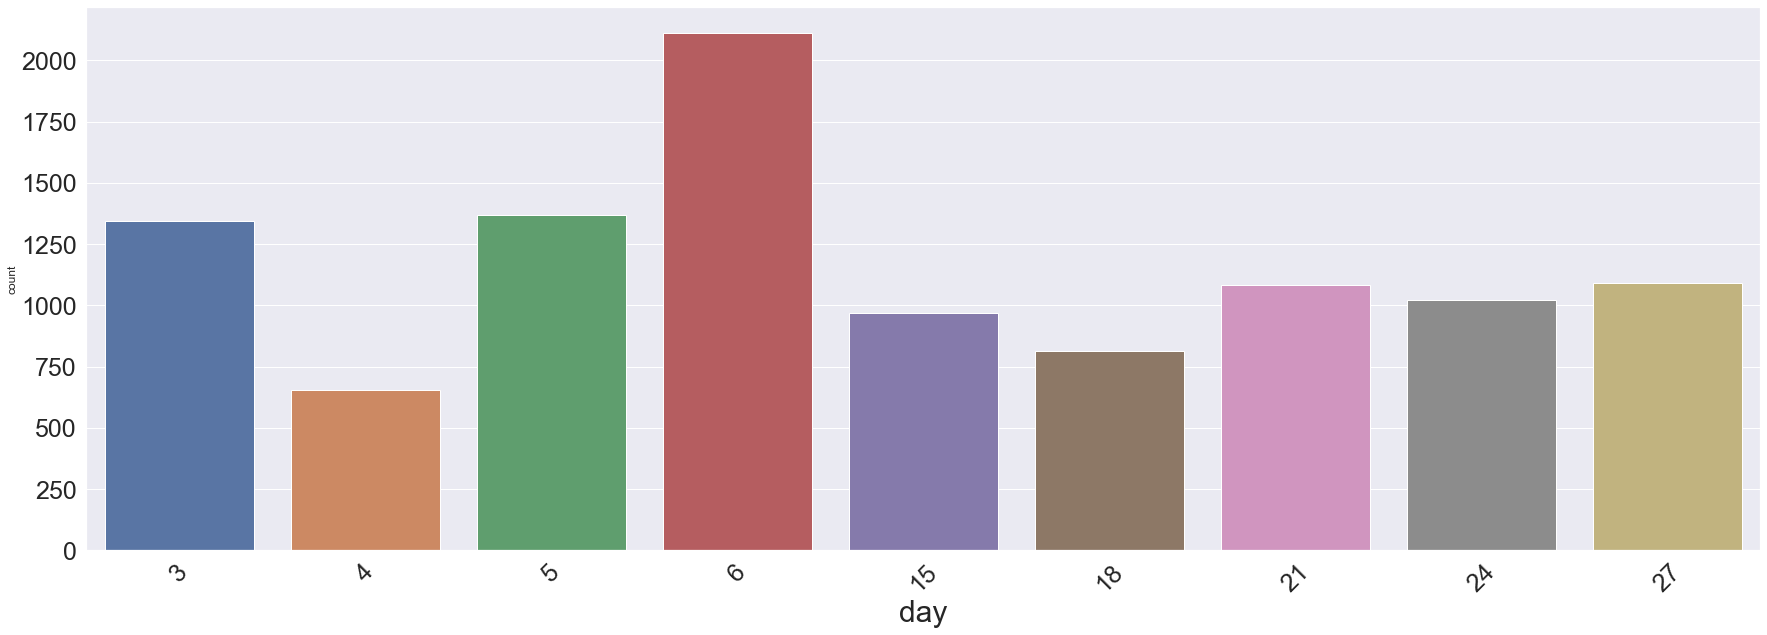

In [24]:
plt.figure(figsize=(30,10))
plt.xticks(rotation = 45,fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(xlabel = 'day', fontsize = 30)
sns.countplot(data['day'])

<AxesSubplot:xlabel='weekday', ylabel='count'>

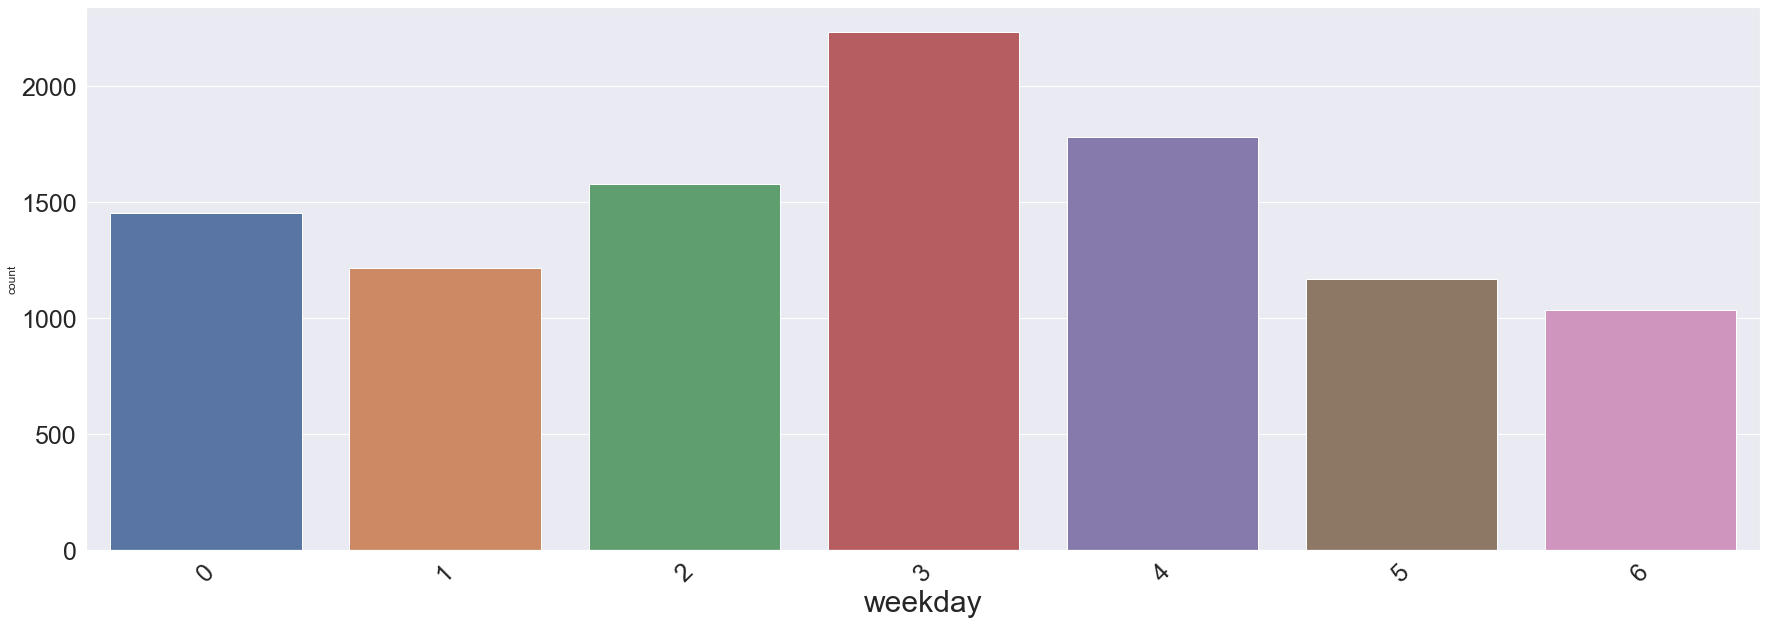

In [25]:
plt.figure(figsize=(30,10))
plt.xticks(rotation = 45,fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(xlabel = 'weekday', fontsize = 30)
sns.countplot(data['weekday'])
##monday = 0 and sunday == 6
##Thursday has most flights

<AxesSubplot:xlabel='month', ylabel='count'>

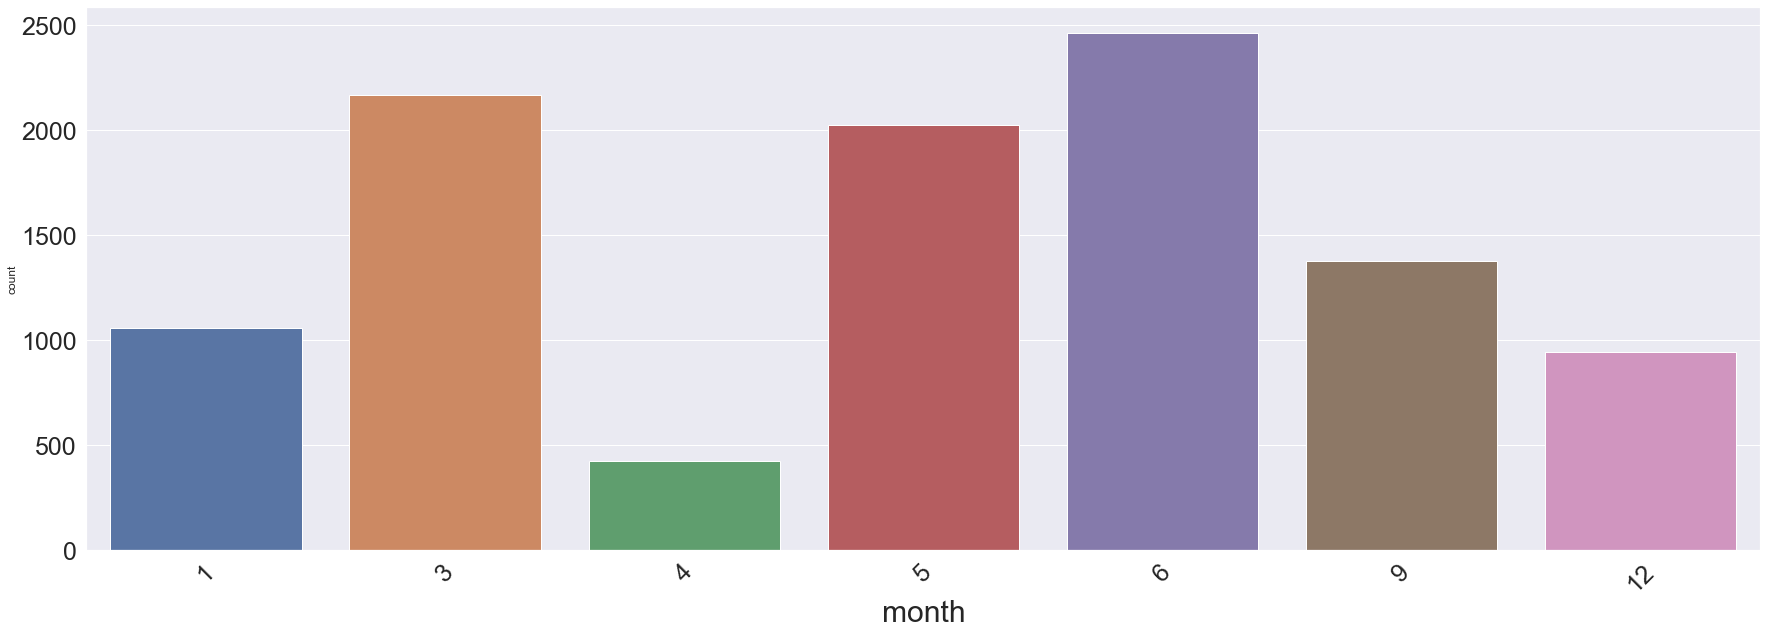

In [26]:
plt.figure(figsize=(30,10))
plt.xticks(rotation = 45,fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(xlabel = 'month', fontsize = 30)
sns.countplot(data['month'].sort_values())
## most flights are in the month of june

<AxesSubplot:xlabel='Price', ylabel='Count'>

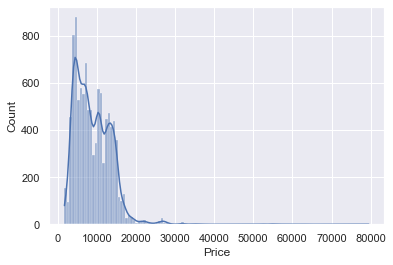

In [27]:
sns.histplot(data['Price'],kde = True)

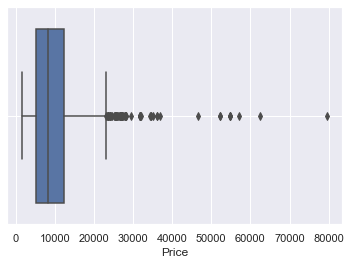

In [28]:
sns.boxplot(data['Price'])
plt.grid('False')

As we can see that a lot of outliers are present, the graph is also skewed, we can impute median value.

### Outlier Handling

In [29]:
data[data['Price'] > 40000].shape

(9, 20)

In [30]:
data['Price'] = np.where(data['Price']>40000,data['Price'].median(),data['Price'])

## Insights

## Bivariate Analysis

<AxesSubplot:xlabel='Airline', ylabel='Price'>

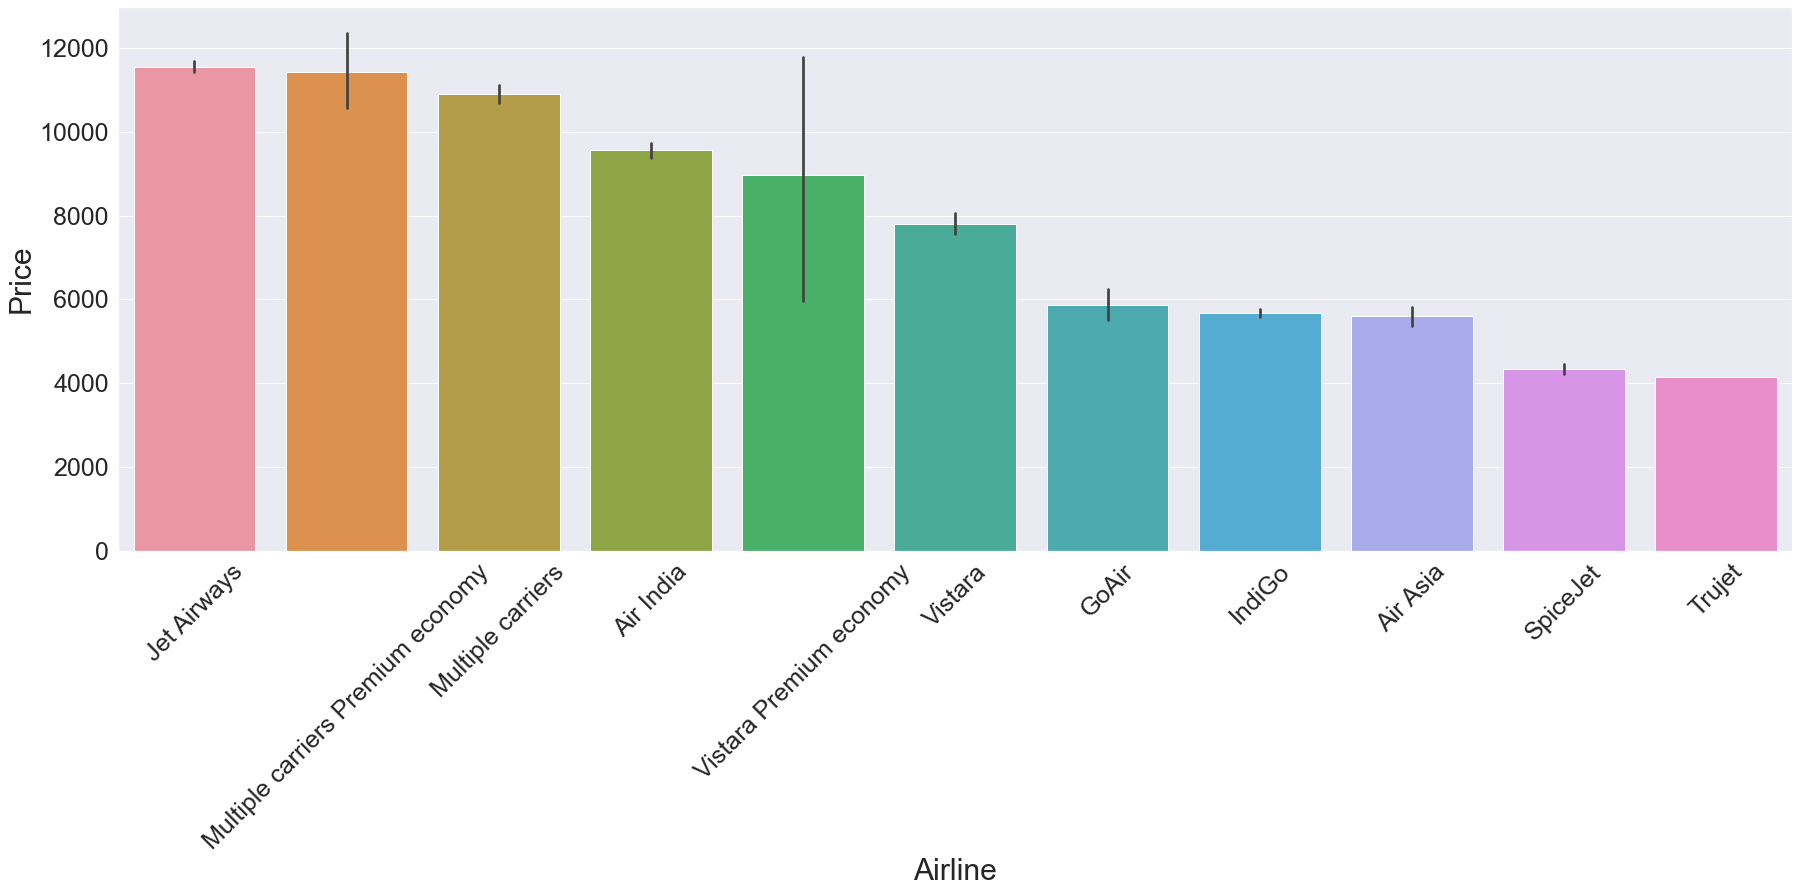

In [31]:
plt.figure(figsize=(30,10))
plt.xticks(rotation = 45,fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(xlabel = 'Airline', fontsize = 30)
plt.ylabel(ylabel = 'Price',fontsize = 30)
sns.barplot(x=data['Airline'],y= data['Price'],order=data.groupby(["Airline"])['Price'].mean().sort_values(ascending=False).index)

<AxesSubplot:xlabel='Source', ylabel='Price'>

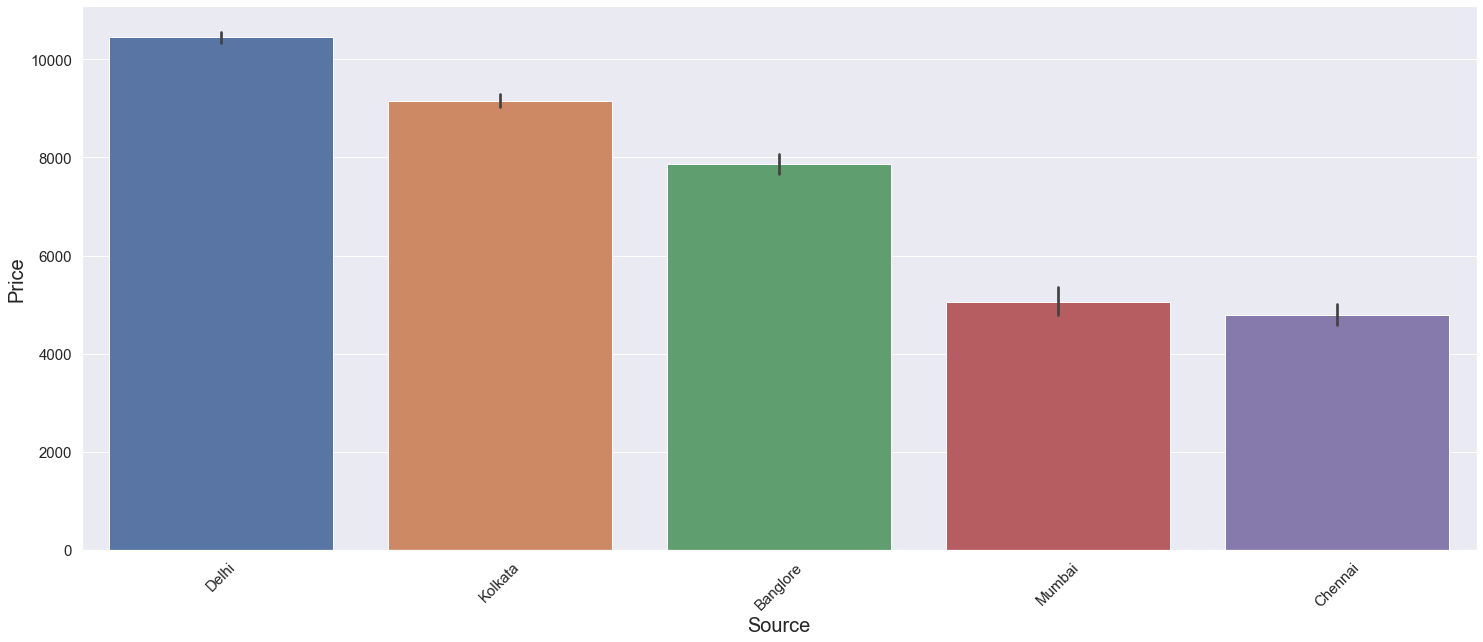

In [32]:
plt.figure(figsize=(25,10))
plt.xticks(rotation = 45,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Source', fontsize = 20)
plt.ylabel(ylabel = 'Price',fontsize = 20)
sns.barplot(x=data['Source'],y= data['Price'],order=data.groupby(["Source"])['Price'].mean().sort_values(ascending=False).index)

<AxesSubplot:xlabel='Destination', ylabel='Price'>

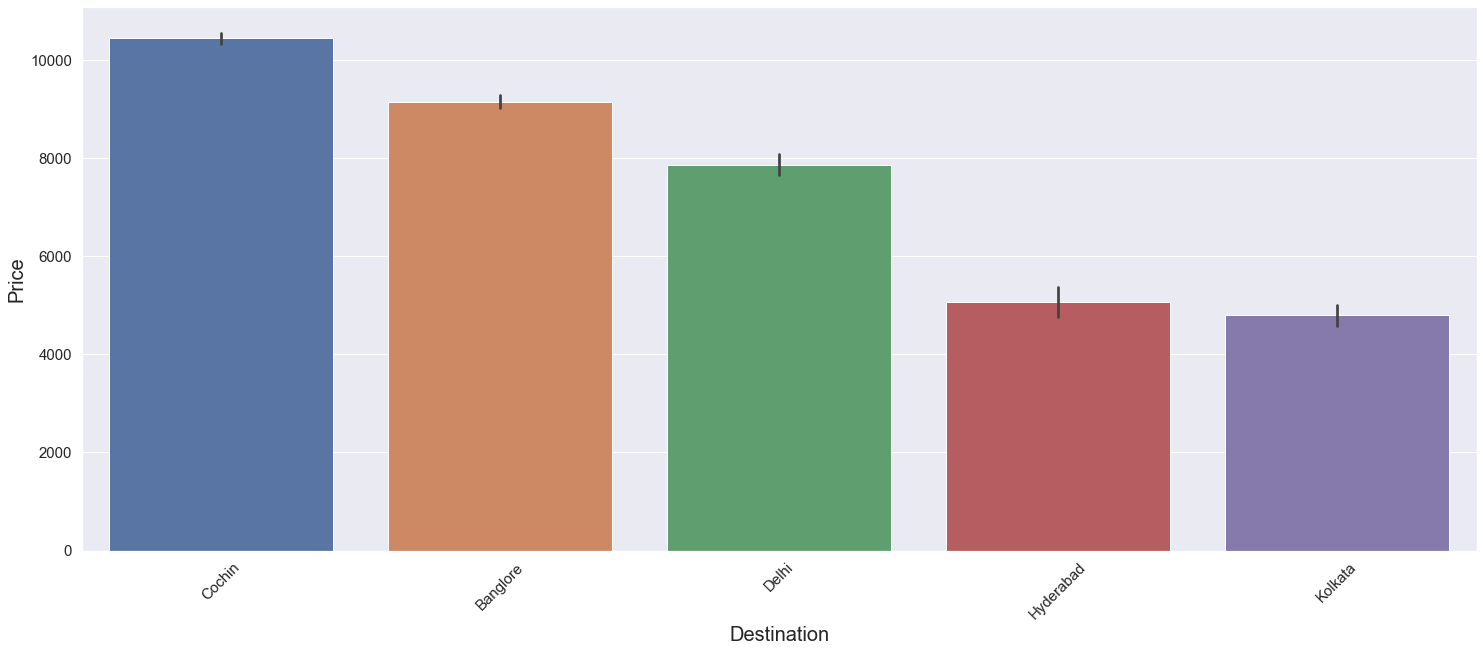

In [33]:
plt.figure(figsize=(25,10))
plt.xticks(rotation = 45,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Destination', fontsize = 20)
plt.ylabel(ylabel = 'Price',fontsize = 20)
sns.barplot(x=data['Destination'],y= data['Price'],order=data.groupby(['Destination'])['Price'].mean().sort_values(ascending=False).index)

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

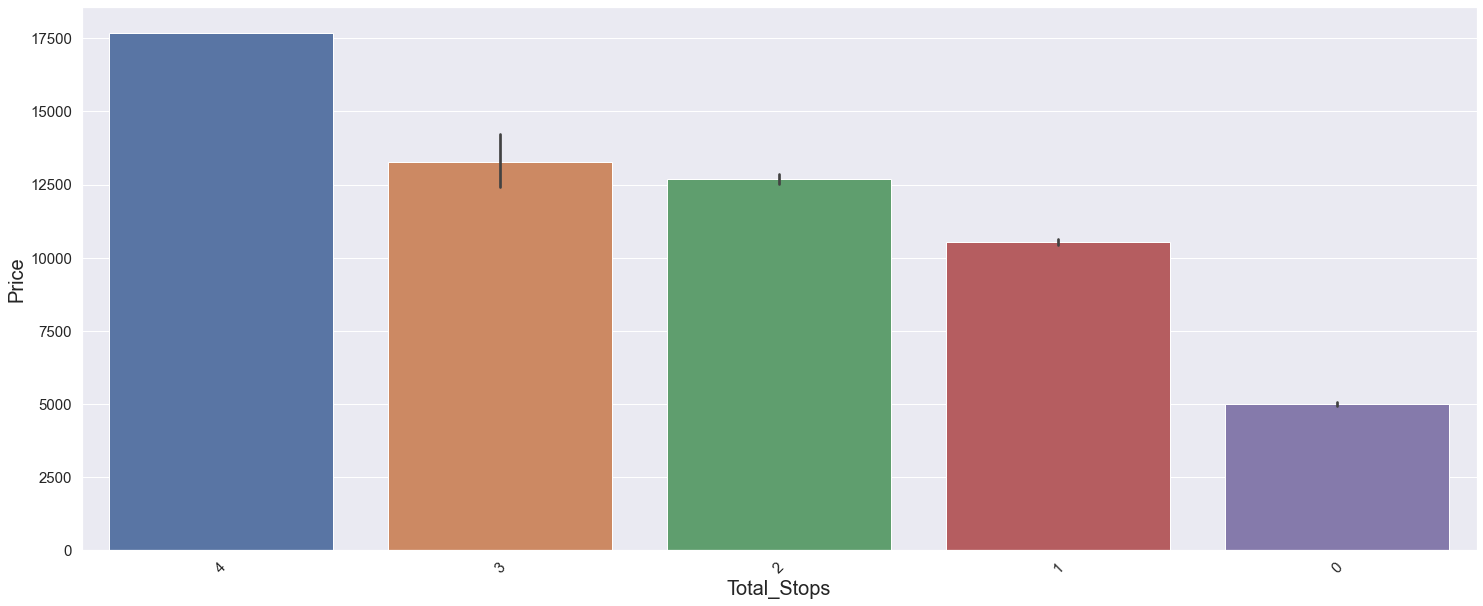

In [34]:
plt.figure(figsize=(25,10))
plt.xticks(rotation = 45,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Total_Stops', fontsize = 20)
plt.ylabel(ylabel = 'Price',fontsize = 20)
sns.barplot(x=data['Total_Stops'],y= data['Price'],order=data.groupby(['Total_Stops'])['Price'].mean().sort_values(ascending=False).index)

<AxesSubplot:xlabel='Airline', ylabel='Duration_Total_Hour'>

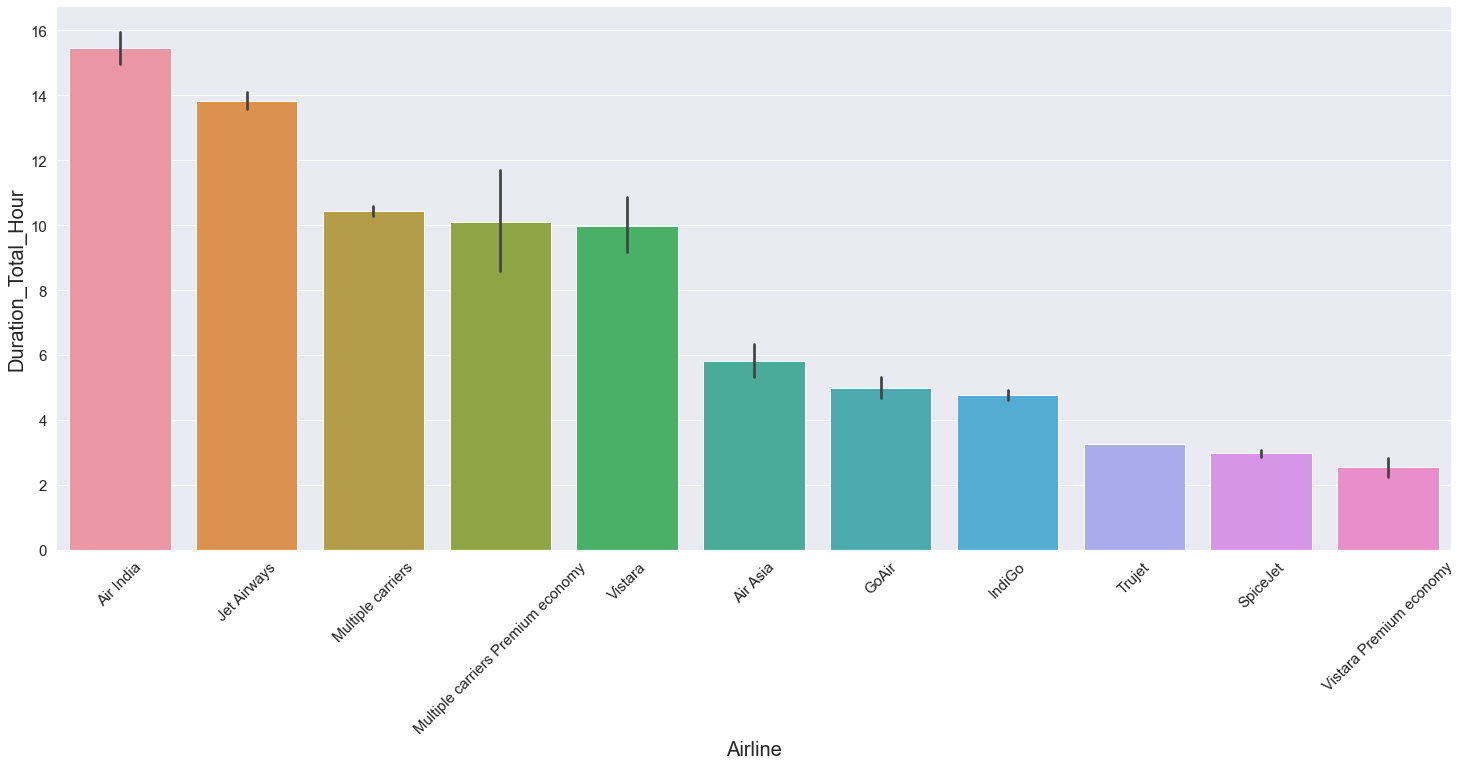

In [35]:
plt.figure(figsize=(25,10))
plt.xticks(rotation = 45,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Airline', fontsize = 20)
plt.ylabel(ylabel = 'Duration_Total_Hour',fontsize = 20)
sns.barplot(x=data['Airline'],y= data['Duration_Total_Hour'],order=data.groupby(['Airline'])['Duration_Total_Hour'].mean().sort_values(ascending=False).index)

<AxesSubplot:xlabel='Duration_Total_Hour', ylabel='Price'>

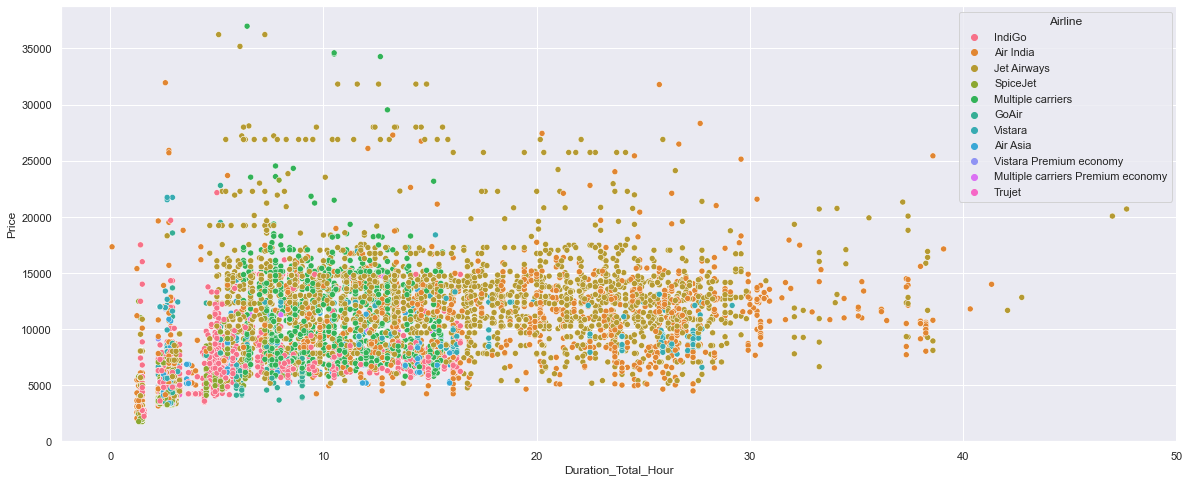

In [36]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=data['Duration_Total_Hour'],y=data['Price'],hue=data['Airline'])

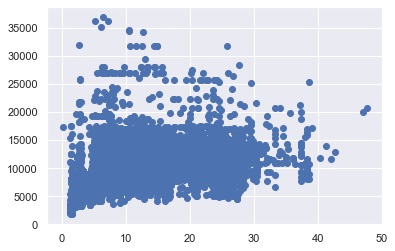

In [37]:
plt.scatter(data['Duration_Total_Hour'],data['Price'])

<AxesSubplot:xlabel='Dep_Time_Hour', ylabel='Price'>

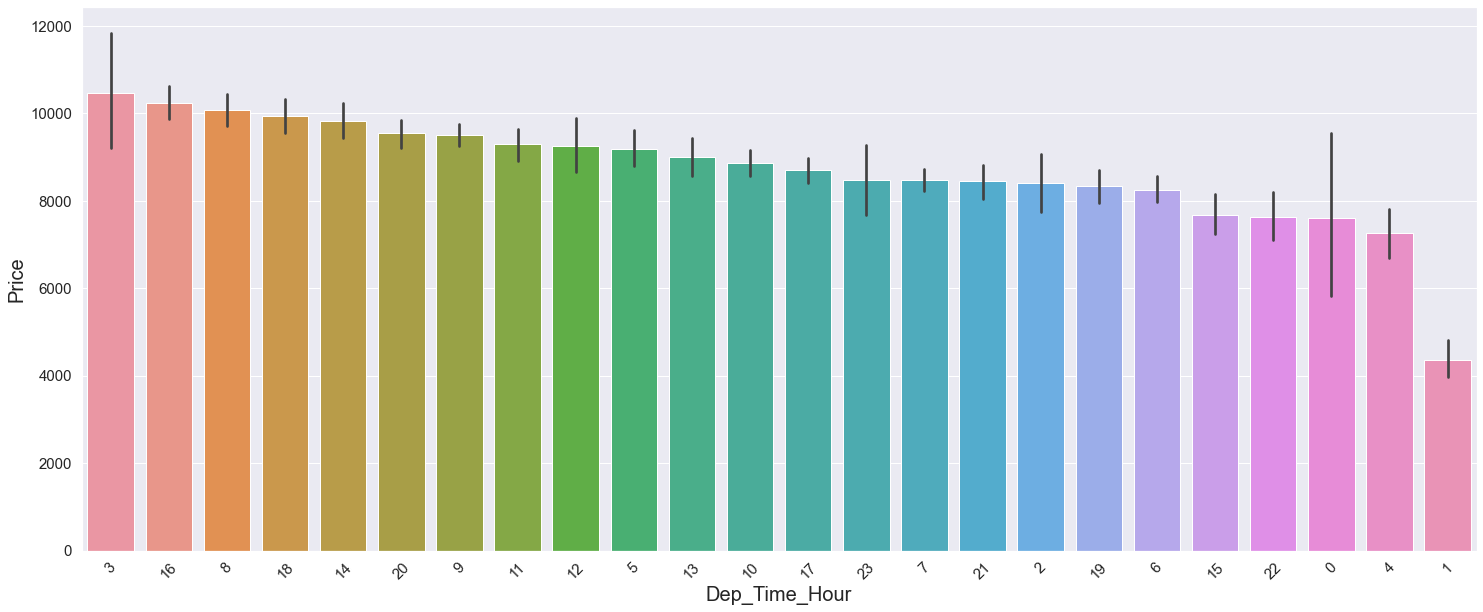

In [38]:
plt.figure(figsize=(25,10))
plt.xticks(rotation = 45,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Dep_Time_Hour', fontsize = 20)
plt.ylabel(ylabel = 'Price',fontsize = 20)
sns.barplot(x=data['Dep_Time_Hour'],y= data['Price'],order=data.groupby(['Dep_Time_Hour'])['Price'].mean().sort_values(ascending=False).index) 

<AxesSubplot:xlabel='Arrival_Time_Hour', ylabel='Price'>

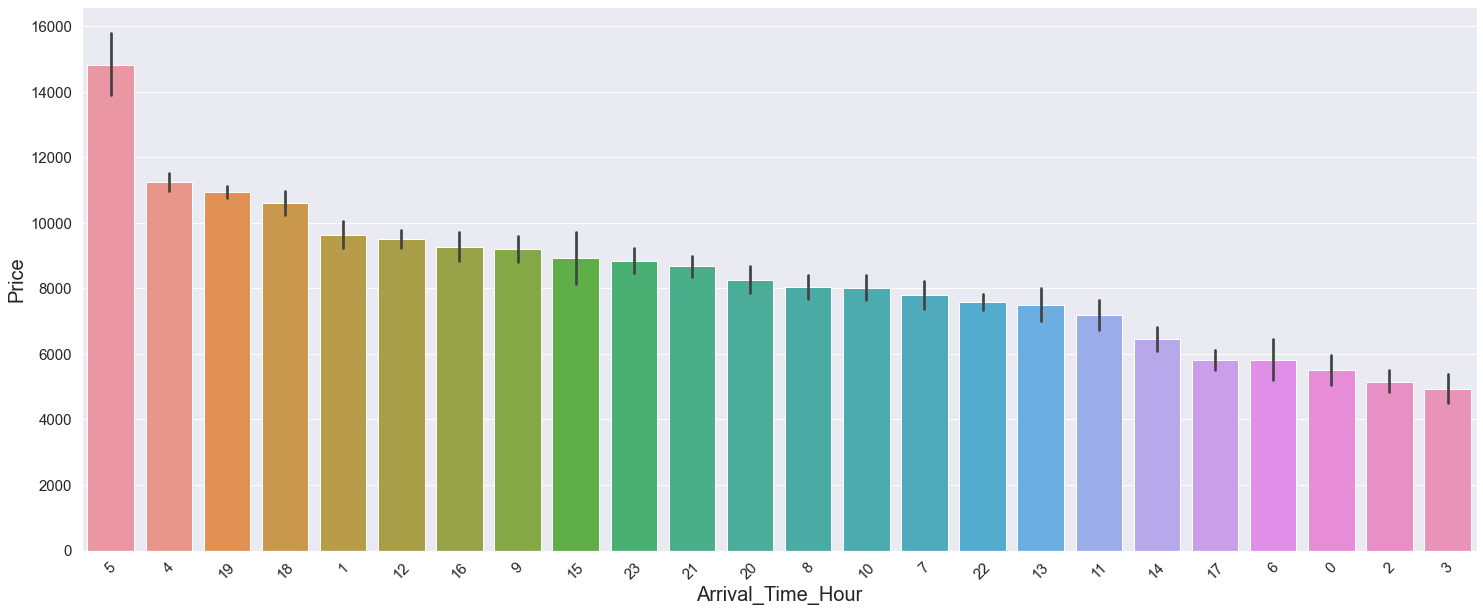

In [39]:
plt.figure(figsize=(25,10))
plt.xticks(rotation = 45,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Arrival_Time_Hour', fontsize = 20)
plt.ylabel(ylabel = 'Price',fontsize = 20)
sns.barplot(x=data['Arrival_Time_Hour'],y= data['Price'],order=data.groupby(['Arrival_Time_Hour'])['Price'].mean().sort_values(ascending=False).index) 

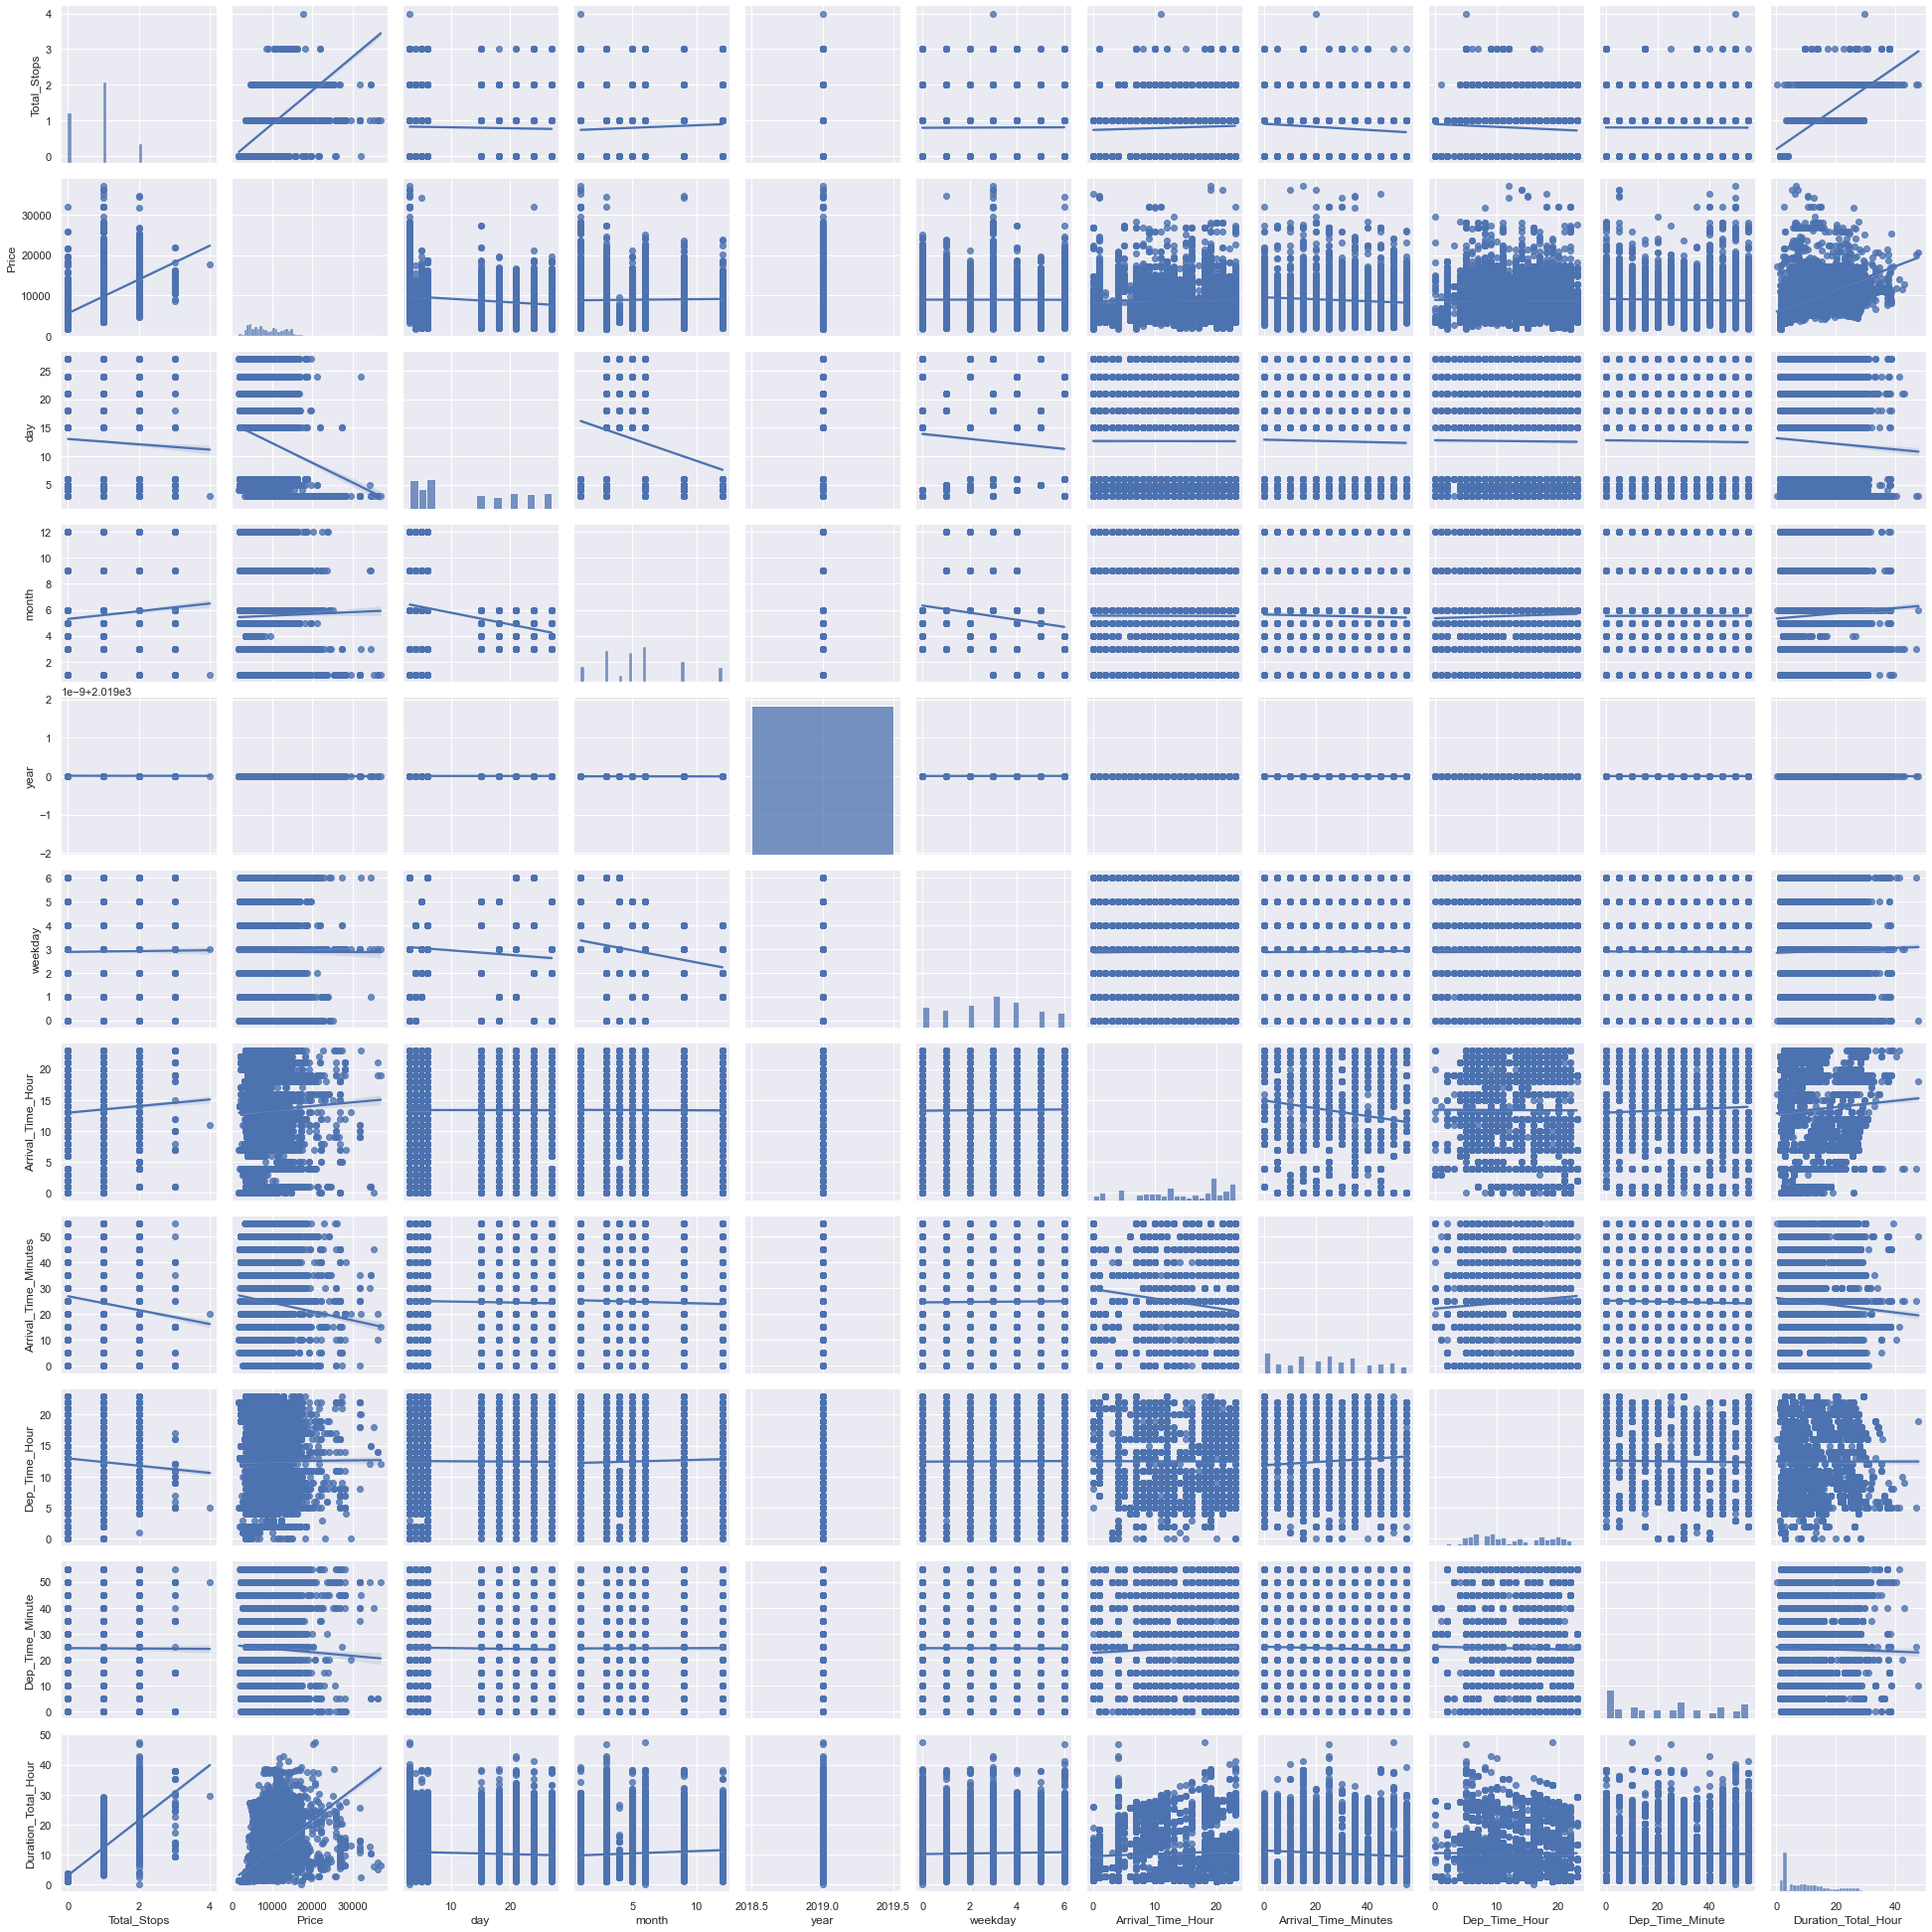

In [40]:
sns.pairplot(data,kind='reg')

## Insights

## Multicollinearity

<AxesSubplot:>

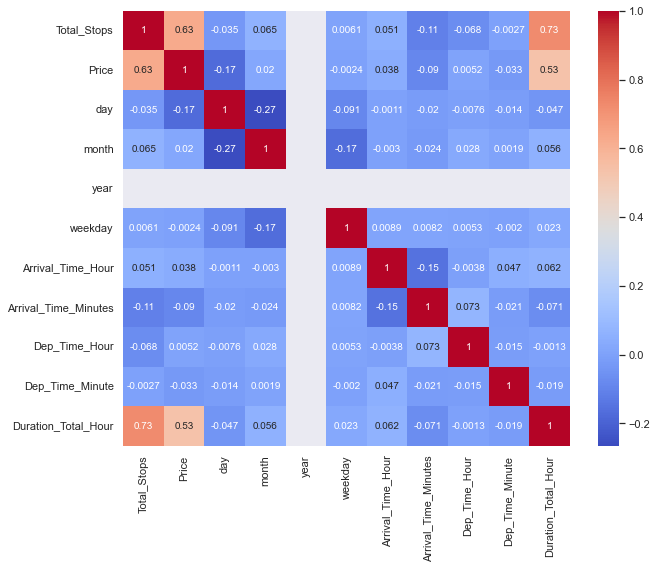

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot = True, cmap = 'coolwarm')

Duration_Total_Hours and Total Stops are highly correlated, we can drop either one.

In [42]:
data_model.drop('Route',axis = 1, inplace = True)

In [43]:
data_model

,Total_Stops,Price,day,month,weekday,Arrival_Time_Hour,Arrival_Time_Minutes,Dep_Time_Hour,Dep_Time_Minute,Duration_Total_Hour,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,6,1,10,22,20,2.833333,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,2,7662,5,1,5,13,15,5,50,7.416667,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,2,13882,6,9,4,4,25,9,25,19.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,1,6218,5,12,3,23,30,18,5,5.416667,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,1,13302,3,1,3,21,35,16,50,4.750000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,4,9,2,22,25,19,55,2.500000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
10679,0,4145,27,4,5,23,20,20,45,2.583333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
10680,0,7229,27,4,5,11,20,8,20,3.000000,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
10681,0,12648,3,1,3,14,10,11,30,2.666667,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0


## Train-Test Split

In [44]:
X = data_model.drop('Price',axis = 1)
Y = data_model['Price']

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

## Feature Selection

In [46]:
from sklearn.ensemble import ExtraTreesRegressor
extractor = ExtraTreesRegressor(random_state = 42)

In [47]:
extractor.fit(X_train,y_train)

ExtraTreesRegressor(random_state=42)

In [48]:
x_columns = X_train.columns
feature_rank = pd.DataFrame({'feature': x_columns, 'importance':extractor.feature_importances_})

In [49]:
feature_rank = feature_rank.sort_values('importance', ascending = False)

<AxesSubplot:xlabel='importance', ylabel='feature'>

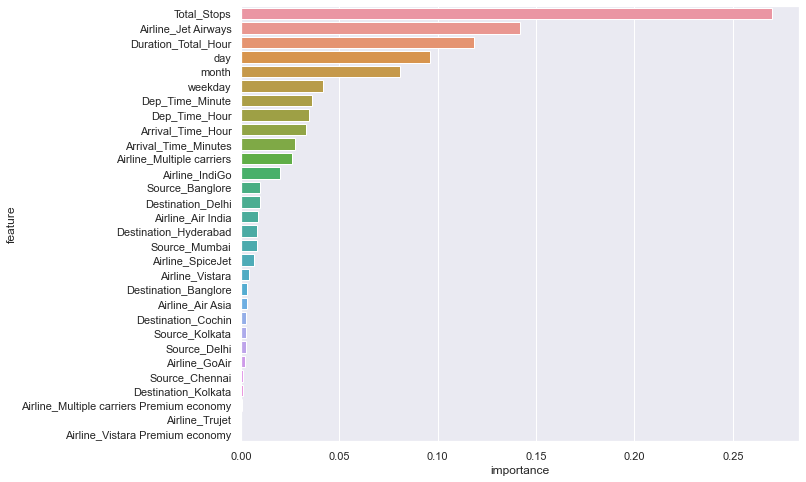

In [50]:
plt.figure(figsize=(10,8))
sns.barplot(y = 'feature', x = 'importance', data = feature_rank) 

In [51]:
feature_rank['cumsum'] = feature_rank['importance'].cumsum() * 100
feature_rank.head(10)

,feature,importance,cumsum
0,Total_Stops,0.270094,27.009370
13,Airline_Jet Airways,0.141892,41.198562
8,Duration_Total_Hour,0.118223,53.020870
1,day,0.096059,62.626728
2,month,0.080928,70.719565
3,weekday,0.041887,74.908258
7,Dep_Time_Minute,0.035986,78.506853
6,Dep_Time_Hour,0.034653,81.972177
4,Arrival_Time_Hour,0.033237,85.295843
5,Arrival_Time_Minutes,0.027395,88.035366


## Model Building

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR # kernel = linear,poly, sigmoid, rbf
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [55]:
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Test_score: {}".format(model.score(X_test,y_test)))
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
    adj_r2 = 1-(1-r2score)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))
    print(f'Adjustced R2 score:{adj_r2}')
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions) 

Model is: LinearRegression()
Training score: 0.5442798883475266
Test_score: 0.5472331847259506
Predictions are: [13433.05474072  4602.82783245  4262.80122148 ... 12545.74347798
 11709.16943649 12292.24636095]


r2 score is: 0.5472331847259506
Adjustced R2 score:0.5406458886744367
MAE:2114.951443446748
MSE:9440313.233209116
RMSE:3072.5092730875713


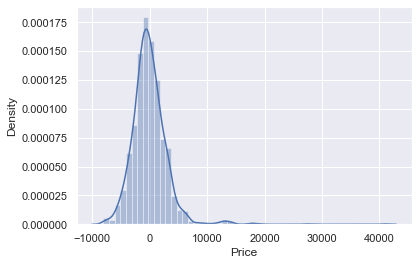

In [56]:
predict(LinearRegression())

Model is: RandomForestRegressor()
Training score: 0.950445937237664
Test_score: 0.808011285176712
Predictions are: [14704.922       3848.57333333  4254.29       ... 11005.61
  7044.56       13518.13      ]


r2 score is: 0.808011285176712
Adjustced R2 score:0.8052180449028523
MAE:1179.2646739020124
MSE:4003017.7655049055
RMSE:2000.7542991344303


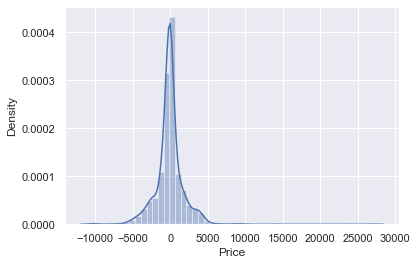

In [57]:
predict(RandomForestRegressor())

Model is: DecisionTreeRegressor()
Training score: 0.9697961300999993
Test_score: 0.6856183485462357
Predictions are: [14815.  3841.  4148. ... 10262.  6795. 13727.]


r2 score is: 0.6856183485462357
Adjustced R2 score:0.6810444156928832
MAE:1379.4556059882148
MSE:6554944.320954107
RMSE:2560.262549223049


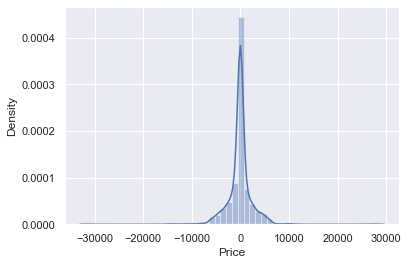

In [58]:
predict(DecisionTreeRegressor())

Model is: SVR()
Training score: 0.006183140341344595
Test_score: 0.015298440231027555
Predictions are: [8608.57137208 8077.52947573 8058.49424549 ... 8576.72992214 8273.1209166
 8212.77457421]


r2 score is: 0.015298440231027555
Adjustced R2 score:0.0009720353847282315
MAE:3500.9652422369077
MSE:20531299.6709401
RMSE:4531.147721156319


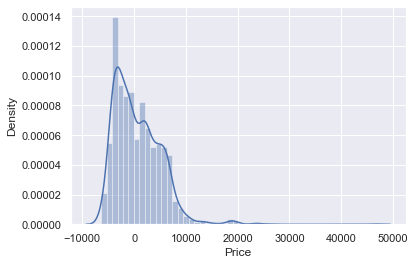

In [59]:
predict(SVR())

Model is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Training score: 0.938994227689506
Test_score: 0.8269134445440087
Predictions are: [14546.034   3739.824   4574.0376 ... 10689.381   7507.01   12877.14  ]


r2 score is: 0.8269134445440087
Adjustced R2 score:0.8243952114384414
MAE:1164.6287535017207


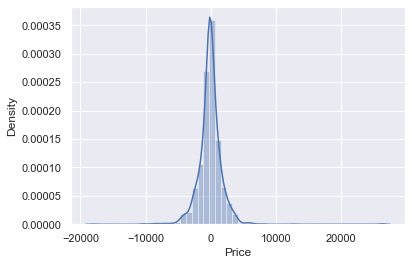

In [60]:
predict(XGBRegressor())

R2 score is increased to 82% approx.

## Without scaling the features we got pretty good result from Random Forest and XGBRegressor, now trying scaling to see whether it can be improved or not.

In [ ]:
data_model.columns

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
from sklearn.preprocessing import StandardScaler

X_train_stand = X_train.copy()
X_test_stand = X_test.copy()
num_cols = ['Total_Stops', 'day', 'month', 'weekday', 'Arrival_Time_Hour','Arrival_Time_Minutes', 'Dep_Time_Hour', 'Dep_Time_Minute','Duration_Total_Hour']

for i in num_cols:
    scale = StandardScaler().fit(X_train_stand[[i]])
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [63]:
def predict_normalized(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train_scaled,y_train)
    print("Training score: {}".format(model.score(X_train_scaled,y_train)))
    predictions = model.predict(X_test_scaled)
    print("Test_score: {}".format(model.score(X_test_scaled,y_test)))
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions)
    adj_r2 = 1-(1-r2score)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))
    print(f'Adjustced R2 score:{adj_r2}')
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions) 

Model is: SVR()
Training score: 0.04464718583110061
Test_score: 0.053412982611781956
Predictions are: [8130.3818521  8057.85325664 7931.76233448 ... 8719.98063144 8450.39690288
 8426.91168398]


Adjustced R2 score:0.03964110554017841
r2 score is: 0.053412982611781956
MAE:3387.9612638548924
MSE:19736600.92828389
RMSE:4442.589439536799


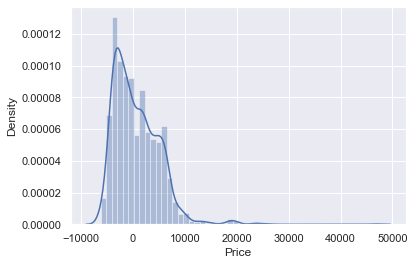

In [64]:
predict_normalized(SVR())

Model is: LinearRegression()
Training score: 0.5442797963460793
Test_score: 0.5472326668396447
Predictions are: [13433.3125  4602.5     4261.9375 ... 12546.0625 11709.6875 12292.9375]


Adjustced R2 score:0.5406453632534125
r2 score is: 0.5472326668396447
MAE:2114.996207596751
MSE:9440324.031281728
RMSE:3072.511030294558


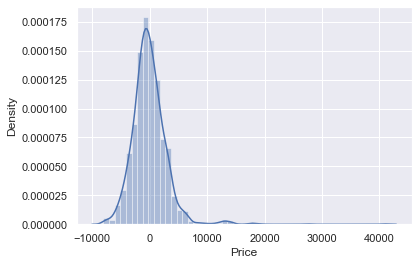

In [65]:
predict_normalized(LinearRegression())

Model is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Training score: 0.938994227689506
Test_score: 0.8268477549058435
Predictions are: [14546.034   3739.824   4574.0376 ... 10689.381   7507.01   12877.14  ]


Adjustced R2 score:0.8243285660829411
r2 score is: 0.8268477549058435
MAE:1165.6309037589024


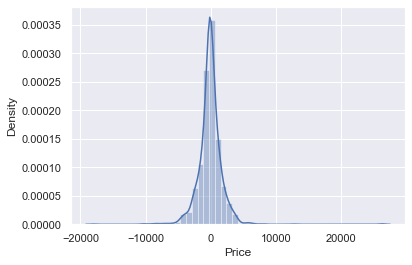

In [66]:
predict_normalized(XGBRegressor())

In [69]:
def predict_standardized(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train_stand,y_train)
    print("Training score: {}".format(model.score(X_train_stand,y_train)))
    predictions = model.predict(X_test_stand)
    print("Test_score: {}".format(model.score(X_test_scaled,y_test)))
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
    adj_r2 = 1-(1-r2score)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))
    print(f'Adjusted R2 score:{adj_r2}')
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions) 

Model is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Training score: 0.938994227689506
Test_score: 0.251371382138045
Predictions are: [14546.034   3739.824   4574.0376 ... 10689.381   7507.01   12877.14  ]


r2 score is: 0.82645282597297
Adjusted R2 score:0.8239278913363013
MAE:1165.2236291381428
MSE:

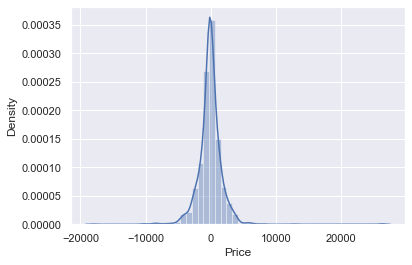

In [70]:
predict_standardized(XGBRegressor())

Model is: LinearRegression()
Training score: 0.5442798883475266
Test_score: 0.3923960646847877
Predictions are: [13433.05474072  4602.82783245  4262.80122148 ... 12545.74347798
 11709.16943649 12292.24636095]


r2 score is: 0.5472331847259506
Adjusted R2 score:0.5406458886744367
MAE:2114.9514434467487
MSE:9440313.233209116
RMSE:3072.5092730875713


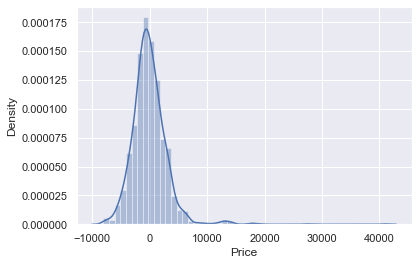

In [71]:
predict_standardized(LinearRegression())

Model is: SVR()
Training score: 0.04145411412627531
Test_score: 0.026861513712586937
Predictions are: [8506.20082511 8008.53219096 7866.28614553 ... 8541.78457633 8397.20500053
 8318.81605614]


r2 score is: 0.05050800297350766
Adjusted R2 score:0.03669386140668185
MAE:3409.1441151169593
MSE:19797170.5566141
RMSE:4449.401145841325


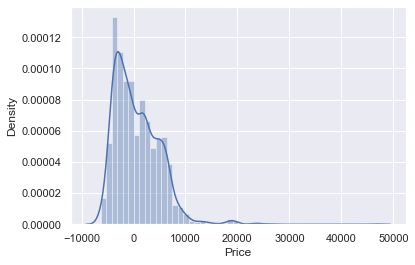

In [72]:
predict_standardized(SVR())

Model is: RandomForestRegressor()
Training score: 0.9501952674769535
Test_score: 0.2240622475802454
Predictions are: [14533.76533333  3845.26133333  4294.22666667 ... 10901.6575
  6936.42       13564.65      ]


r2 score is: 0.8076801490770227
Adjusted R2 score:0.8048820911101511
MAE:1178.2189537930087
MSE:4009922.044702129
RMSE:2002.47897484646


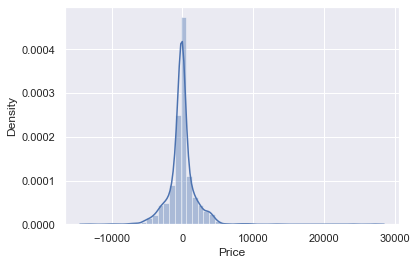

In [85]:
predict_standardized(RandomForestRegressor())

## HyperParameter Tuning of XGBRegressor & RandomForest Regressor

## XGBREGRESSOR Hyperparameter Tuning

In [73]:
from sklearn.model_selection import RandomizedSearchCV
params = {'learning_rate': np.linspace(0.01,1,10),
              'max_depth': range(5, 20),
              'min_child_weight': range(1, 5),
              'subsample': np.linspace(0.3, 0.9,10),
              'colsample_bytree': [0.2, 0.25, 0.3, 0.4, 0.5, 0.9],
              'n_estimators': range(200, 500)}
cv_xgb = RandomizedSearchCV(XGBRegressor(), params, scoring = 'r2',cv = 10)

In [74]:
cv_xgb.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                                          predictor=None, random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.2, 0.25, 0.3,
                                                             0.4, 0.5, 0.9],
                                        'learning_rate': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                                        'max_depth': range(5, 20),
                                        'min_child_weight': range(1, 5),
                                        'n_estimators': range(200, 500),
                                        'subsample': array([0.3       , 0.36666667, 0.43333333, 0.5       , 0.56666667,
       0.63333333, 0.7       , 0.76666667, 0.83333333, 0.9       ])},
                   scoring='r2')

In [75]:
cv_xgb.best_params_

{'subsample': 0.43333333333333335,
 'n_estimators': 370,
 'min_child_weight': 1,
 'max_depth': 9,
 'learning_rate': 0.34,
 'colsample_bytree': 0.2}

Model is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=480, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Training score: 0.9034172740884082
Test_score: 0.8083645238213818
Predictions are: [15425.918  3918.842  4225.856 ... 10377.574  9006.759 11689.553]


Adjustced R2 score:0.8055764228100537
r2 score is: 0.8083645238213818
MAE:1261.0975726146305
MSE:3995652

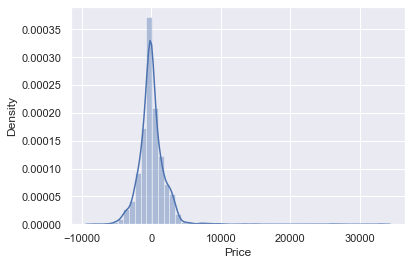

In [76]:
predict_normalized(XGBRegressor(subsample = 0.8333333333333335,n_estimators = 480,min_child_weight = 2,max_depth = 15,learning_rate = 0.01,colsample_bytree = 0.3))

Model is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=480, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Training score: 0.9033973394431303
Test_score: 0.8082546553932156
Predictions are: [15452.867   3914.9346  4233.7144 ... 10370.972   9060.743  11691.324 ]


r2 score is: 0.8082546553932156
Adjustced R2 score:0.8054649559081508
MAE:1261.0582887200267
MSE:3

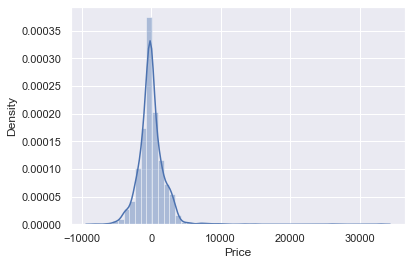

In [77]:
predict(XGBRegressor(subsample = 0.8333333333333335,n_estimators = 480,min_child_weight = 2,max_depth = 15,learning_rate = 0.01,colsample_bytree = 0.3))

Model is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=480, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Training score: 0.903353910854876
Test_score: 0.2267391648986673
Predictions are: [15438.0625  3914.667   4242.759  ... 10368.518   8988.484  11687.084 ]


r2 score is: 0.8081478447511393
Adjusted R2 score:0.8053565912800114
MAE:1262.0893250240758
MSE:400

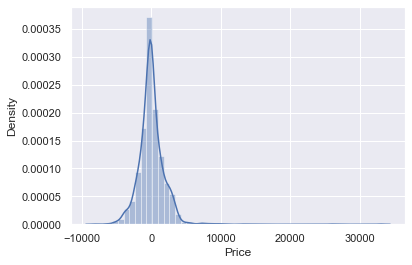

In [78]:
predict_standardized(XGBRegressor(subsample = 0.8333333333333335,n_estimators = 480,min_child_weight = 2,max_depth = 15,learning_rate = 0.01,colsample_bytree = 0.3))

## RandomForest Hyperparameter Tuning

In [79]:
params = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

rf=RandomForestRegressor()
rf_cv=RandomizedSearchCV(rf,params,cv=10,n_jobs=-1,scoring = 'r2')

rf_cv.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 220]},
                   scoring='r2')

In [80]:
rf_cv.best_params_

{'n_estimators': 120, 'max_features': 'sqrt', 'max_depth': 20}

Model is: RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=180)
Training score: 0.9460457485991364
Test_score: 0.8108423435910986
Predictions are: [15375.57100936  3853.65745168  4279.08232688 ... 10508.90700728
  9834.34998401 11442.09080526]


Adjustced R2 score:0.8080902923339371
r2 score is: 0.8108423435910986
MAE:1250.839809779049
MSE:3943989.4151229407
RMSE:1985.9479890276434


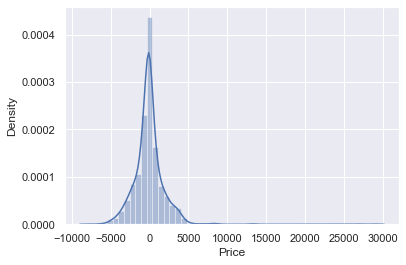

In [81]:
predict_normalized(RandomForestRegressor(n_estimators = 180, max_features = 'sqrt', max_depth = 20))

Model is: RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=180)
Training score: 0.9461891237732124
Test_score: 0.810123472953346
Predictions are: [15050.1037037   3851.38087154  4286.80596202 ... 10236.67977504
  9341.39361856 11509.22554949]


r2 score is: 0.810123472953346
Adjustced R2 score:0.8073609628605236
MAE:1249.4572920848598
MSE:3958978.066600046
RMSE:1989.7180872173942


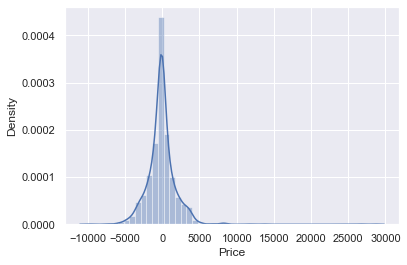

In [82]:
predict(RandomForestRegressor(n_estimators = 180, max_features = 'sqrt', max_depth = 20))

Model is: RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=180)
Training score: 0.9451676193912043
Test_score: 0.21886693366667276
Predictions are: [14998.98648148  3853.70152076  4268.59666667 ... 10790.28185751
  9407.6921758  11279.12900206]


r2 score is: 0.8097582198797175
Adjusted R2 score:0.8069903957266581
MAE:1258.523847024811
MSE:3966593.694133082
RMSE:1991.630913129509


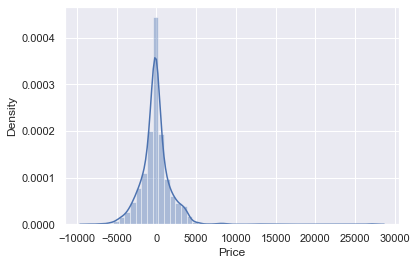

In [83]:
predict_standardized(RandomForestRegressor(n_estimators = 180, max_features = 'sqrt', max_depth = 20))

## Final Result

### XGBoost Regressor  with or without scaling is chosen as the best model.